In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

import random

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [2]:
data = pd.read_csv('creditcard.csv')
data.shape

(284807, 31)

In [3]:
pd.set_option('display.max_column', 31)
data[:20]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [27]:

Y = data.iloc[:,30]
X = data.iloc[:,0:30]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state=42)

In [29]:
X_train[:20]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2557,2105.0,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,-0.434426,0.330147,0.582071,0.112201,-0.215089,1.267783,-0.896319,-0.298897,-0.613436,-0.401911,-0.831985,-0.210837,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,1.00
247823,153702.0,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,-0.359561,0.905251,0.689143,-0.283648,1.074658,0.549725,-0.508424,0.072520,-0.904567,-0.884600,2.142593,0.853186,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,1194.28
152342,97283.0,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,-0.724328,-2.114621,-3.022907,1.215878,0.137917,-2.456654,-1.297028,0.968448,2.063020,-0.464144,-0.554004,-0.509915,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,75.00
103385,68628.0,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,-0.130220,1.401227,0.405652,-0.751172,0.102870,0.771533,0.521996,-0.043959,-0.031356,-0.137183,-0.149985,-0.240464,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,1.98
8771,11951.0,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,-0.659956,1.093326,-2.530624,1.194529,1.573518,-0.486271,0.891702,-0.389181,0.479331,-0.470981,0.122458,-0.279519,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,37.31
277115,167472.0,-0.428006,0.635064,-2.273366,-1.377586,2.615307,3.294754,-0.085830,1.225613,-0.043560,-1.016532,-0.073310,-0.091652,-0.270353,-0.809552,0.230342,0.510446,0.525435,0.188327,-0.639836,-0.313757,0.106080,0.207328,0.326171,0.622640,-0.845222,0.316149,-0.237558,0.047550,45.00
256977,157941.0,1.663466,0.016157,-3.079447,0.963219,0.563972,-1.901839,0.850784,-0.448029,0.649787,-1.537422,0.110711,-0.820379,-1.421908,-2.481261,0.926819,0.483621,2.397074,1.258053,-0.580975,0.148275,0.034474,-0.168687,-0.189979,-0.309281,0.248661,-0.531052,-0.009324,0.045708,200.24
85356,60741.0,-1.574913,0.051224,-0.600985,-0.463122,-5.467420,2.338382,6.104438,-1.343913,-0.453083,-1.147250,-0.195981,-0.571463,0.274020,-0.175579,1.156836,0.651390,-0.536140,-0.219202,0.233232,-1.197075,-0.371665,0.450074,0.047702,0.585418,-0.050075,1.086967,0.619743,-0.402418,1199.00
119402,75434.0,-0.583508,1.261753,0.916148,0.800477,0.168114,-0.593644,0.646759,0.012355,-0.614061,-0.122521,-0.866515,-0.085844,0.301397,0.357297,1.019987,-0.200173,-0.272668,0.209865,0.574808,-0.057364,0.136155,0.480842,-0.138701,0.045666,-0.203985,-0.349438,-0.237461,-0.135806,7.95
183958,126034.0,2.103006,-0.289341,-1.191486,-0.670530,-0.015167,-0.683247,-0.091911,-0.260369,0.890406,-0.301852,-0.563548,1.103015,1.452402,-0.148231,0.385410,-0.216665,-0.334997,-0.714535,0.315454,-0.077996,-0.032654,0.139503,0.224339,0.706789,-0.172157,0.777629,-0.077465,-0.058962,1.00


In [30]:
print("X_train =", len(X_train))
print("X_test =", len(X_test))
print("Y_train =", len(Y_train))
print("Y_test =", len(Y_test))

X_train = 199364
X_test = 85443
Y_train = 199364
Y_test = 85443


In [31]:
weights = np.linspace(0.5, 0.95, 10)
weights

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [37]:
F1_Score = np.zeros(weights.shape)
F1_Score

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
AUC_Score = np.zeros(weights.shape)
AUC_Score

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
for i in range(len(weights)):
    model = LogisticRegression(class_weight={0:1, 1:weights[i]})
    
    model.fit(X_train, Y_train)
    
    prediction = model.predict(X_test)
    
    decision_values = model.decision_function(X_test)
    
    F1_Score[i] = f1_score(Y_test, prediction)
    AUC_Score[i] = roc_auc_score(Y_test, decision_values)

    

Text(0, 0.5, 'AUC')

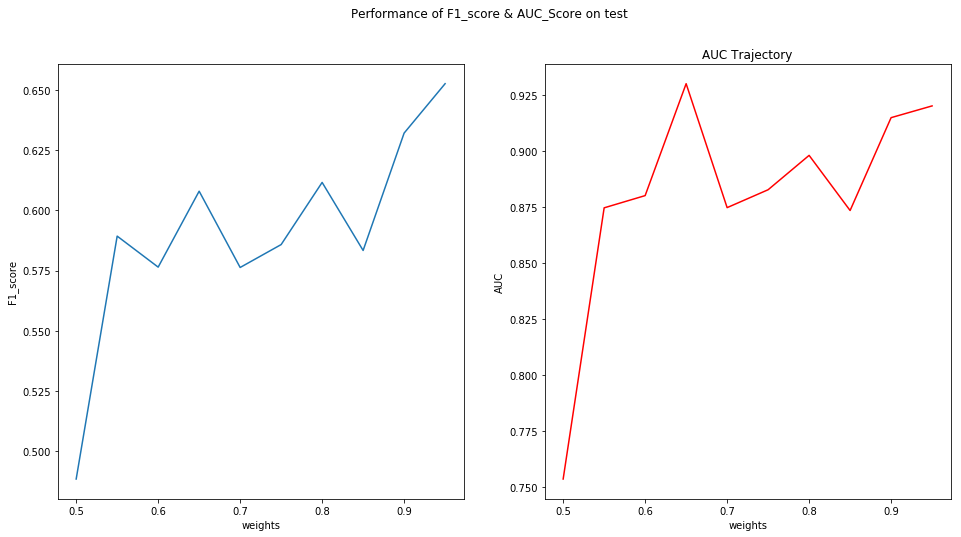

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False ,figsize=(16, 8))
f.suptitle('Performance of F1_score & AUC_Score on test')

ax1.plot(weights, F1_Score)
ax1.set_title = 'F1_Score'
ax1.set_xlabel('weights')
ax1.set_ylabel('F1_score')

ax2.plot(weights, AUC_Score, color ='r')
ax2.set_title('AUC Trajectory')
ax2.set_xlabel('weights')
ax2.set_ylabel('AUC')

